In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import socket
import struct

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = 'C:\\Users\\udayk\\Desktop\\mmj\\fdata.csv'

df = pd.read_csv(data)

In [4]:
df.shape

(59999, 80)

In [5]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [6]:
df.columns[df.isnull().any()].tolist()

[]

ValueError: num must be 1 <= num <= 8, not 9

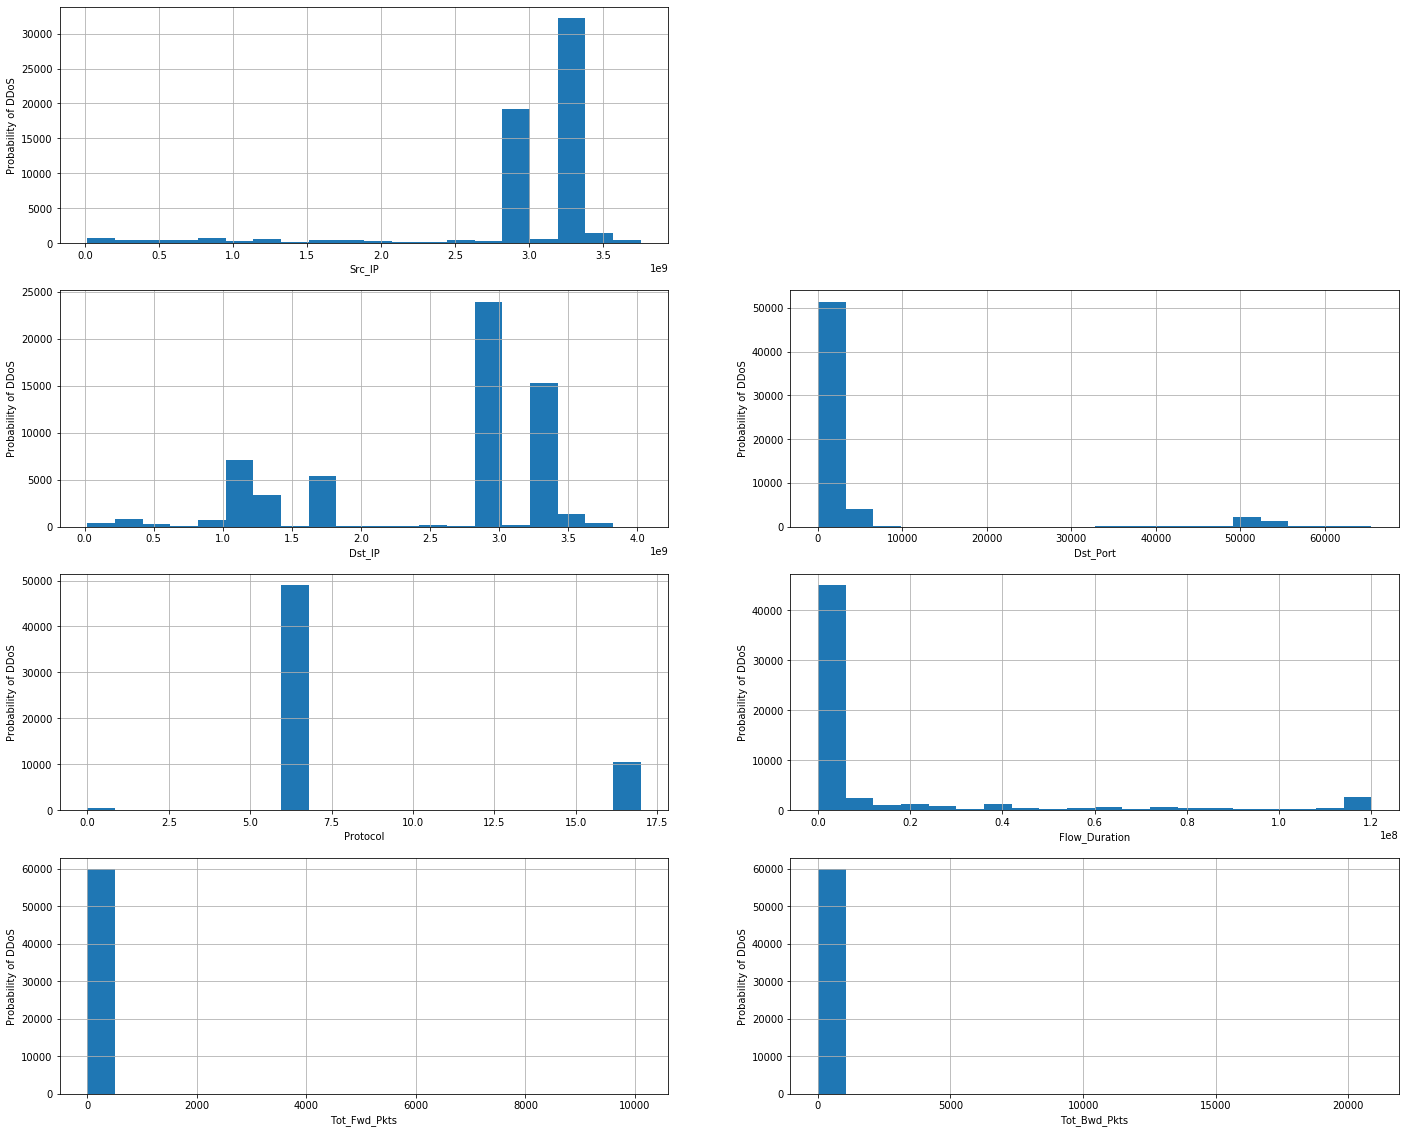

In [66]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['Src_IP'].hist(bins=20)
fig.set_xlabel('Src_IP')
fig.set_ylabel('Probability of DDoS')

#plt.subplot(4, 2, 2)
#fig = df['Src_port'].hist(bins=20)
#fig.set_xlabel('Src_port')
#fig.set_ylabel('Probability of DDoS')

plt.subplot(4, 2, 3)
fig = df['Dst_IP'].hist(bins=20)
fig.set_xlabel('Dst_IP')
fig.set_ylabel('Probability of DDoS')

plt.subplot(4, 2, 4)
fig = df['Dst_Port'].hist(bins=20)
fig.set_xlabel('Dst_Port')
fig.set_ylabel('Probability of DDoS')

plt.subplot(4, 2, 5)
fig = df['Protocol'].hist(bins=20)
fig.set_xlabel('Protocol')
fig.set_ylabel('Probability of DDoS')

plt.subplot(4, 2, 6)
fig = df['Flow_Duration'].hist(bins=20)
fig.set_xlabel('Flow_Duration')
fig.set_ylabel('Probability of DDoS')

plt.subplot(4, 2, 7)
fig = df['Tot_Fwd_Pkts'].hist(bins=20)
fig.set_xlabel('Tot_Fwd_Pkts')
fig.set_ylabel('Probability of DDoS')

plt.subplot(4, 2, 8)
fig = df['Tot_Bwd_Pkts'].hist(bins=20)
fig.set_xlabel('Tot_Bwd_Pkts')
fig.set_ylabel('Probability of DDoS')

plt.subplot(4, 2, 9)
fig = df['TotLen_Fwd_Pkts'].hist(bins=20)
fig.set_xlabel('TotLen_Fwd_Pkts')
fig.set_ylabel('Probability of DDoS')

plt.subplot(4, 2, 10)
fig = df['TotLen_Bwd_Pkts'].hist(bins=20)
fig.set_xlabel('TotLen_Bwd_Pkts')
fig.set_ylabel('Probability of DDoS')

plt.subplot(4, 2, 11)
fig = df['Fwd_Seg_Size_Min'].hist(bins=20)
fig.set_xlabel('Fwd_Seg_Size_Min')
fig.set_ylabel('Probability of DDoS')

In [63]:
df.head(20)

,Src_IP,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pktl_Len_Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,target_class
0,3232236663,3410565195,80,6,3974862,29,44,86,59811,86,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
1,3232236663,3410565195,80,6,63,1,1,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
2,3232236663,3410565195,80,6,476078,2,6,86,3037,86,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
3,3232236663,3410565195,80,6,151,2,1,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3232236663,3410565195,80,6,472507,2,5,73,1050,73,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
5,3232236663,3410565195,80,6,138,1,1,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
6,3232236663,3410565195,80,6,469596,2,5,69,890,69,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
7,3232236663,3410565195,80,6,1978,1,1,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
8,3232236663,3410565195,80,6,468629,2,5,70,669,70,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
9,3232236663,3410565195,80,6,102,1,1,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 81 columns):
Src_IP               59999 non-null int64
Src Port             59999 non-null int64
Dst_IP               59999 non-null int64
Dst Port             59999 non-null int64
Protocol             59999 non-null int64
Flow Duration        59999 non-null int64
Tot Fwd Pkts         59999 non-null int64
Tot Bwd Pkts         59999 non-null int64
TotLen Fwd Pkts      59999 non-null int64
TotLen Bwd Pkts      59999 non-null int64
Fwd Pkt Len Max      59999 non-null int64
Fwd Pkt Len Min      59999 non-null int64
Fwd Pkt Len Mean     59999 non-null float64
Fwd Pkt Len Std      59999 non-null float64
Bwd Pkt Len Max      59999 non-null int64
Bwd Pkt Len Min      59999 non-null int64
Bwd Pkt Len Mean     59999 non-null float64
Bwd Pkt Len Std      59999 non-null float64
Flow Pkts/s          59999 non-null float64
Flow IAT Mean        59999 non-null float64
Flow IAT Std         59999 non-null flo

In [46]:
def ip2int(addr):
    return struct.unpack("!I", socket.inet_aton(addr))[0]
#def ip2int(ip):
#    o = map(int, ip.split('.'))
#    res = (16777216 * o[0]) + (65536 * o[1]) + (256 * o[2]) + o[3]
#    return res

def Int2IP(ipnum):
    o1 = int(ipnum / 16777216) % 256
    o2 = int(ipnum / 65536) % 256
    o3 = int(ipnum / 256) % 256
    o4 = int(ipnum) % 256
    return '%(o1)s.%(o2)s.%(o3)s.%(o4)s' % locals()

In [47]:
df.Src_IP.apply(lambda x: ip2int(x))

0        3232236662
1        3232236662
2        3232236662
3        3232236662
4        3232236662
            ...    
59995    2887729751
59996    2887729163
59997    2887730455
59998    3232238097
59999    2887729690
Name: Src_IP, Length: 60000, dtype: int64

In [61]:
df.Dst_IP.apply(lambda x: ip2int(x))

0        3410565195
1        3410565195
2        3410565195
3        3410565195
4        3410565195
            ...    
59995    2887712770
59996    2852039166
59997    2887712770
59998     918562044
59999    2887712770
Name: Dst_IP, Length: 60000, dtype: int64

In [49]:
df['target_class'].value_counts()

0    30000
1    29999
Name: target_class, dtype: int64

In [50]:
round(df.describe(),2)

,Src_IP,Src Port,Dst_IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,target_class
count,5.999900e+04,59999.00,5.999900e+04,59999.00,59999.00,5.999900e+04,59999.00,59999.00,59999.00,59999.00,...,59999.00,5.999900e+04,59999.00,5.999900e+04,5.999900e+04,5.999900e+04,59999.00,5.999900e+04,5.999900e+04,59999.0
mean,2.928749e+09,29338.85,2.528640e+09,4098.37,7.87,1.440959e+07,7.90,11.35,342.71,11032.83,...,7.27,2.697059e+05,197856.48,5.113795e+05,1.426696e+05,3.826779e+06,347656.06,4.201537e+06,3.507851e+06,0.5
std,6.486651e+08,25482.71,9.103448e+08,13409.31,4.24,3.095443e+07,98.17,194.64,1210.39,272056.85,...,8.91,2.472502e+06,1573565.65,3.448329e+06,2.066965e+06,1.198692e+07,2156348.14,1.271172e+07,1.170960e+07,0.5
min,1.718418e+07,0.00,2.042831e+07,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,...,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.0
25%,2.887730e+09,2726.50,1.632277e+09,80.00,6.00,4.130000e+02,1.00,1.00,0.00,0.00,...,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.0
50%,3.232236e+09,36936.00,2.887713e+09,80.00,6.00,4.688340e+05,2.00,2.00,58.00,118.00,...,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.0
75%,3.232236e+09,53403.50,3.410565e+09,443.00,6.00,6.017230e+06,6.00,7.00,229.00,1581.00,...,20.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1.0
max,3.755864e+09,65532.00,4.026532e+09,65518.00,17.00,1.199996e+08,10105.00,20861.00,54342.00,30365784.00,...,44.00,1.059147e+08,65906755.16,1.059147e+08,1.059147e+08,1.199339e+08,64689315.27,1.199339e+08,1.199339e+08,1.0


In [51]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

In [52]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((47999, 80), (12000, 80))

In [54]:
cols = X_train.columns

In [55]:
np.isnan(X_train)

,Src_IP,Src Port,Dst_IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
5778,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57166,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29516,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52416,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42613,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
df_selected_ddos =df.fillna(df.mean())
df_selected_ddos.to_csv('C:\\Users\\udayk\\Desktop\\mmj\\fdata.csv')

In [22]:
np.any(np.isnan(df))

False

In [16]:
np.any(np.isnan(X_test))

False

In [34]:
df.fillna(df.mean())

,Src_IP,Src Port,Dst_IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,target_class
0,3232236662,4504,3410565195,80,6,3974862,29,44,86,59811,...,0,0.0,0.00000,0,0,0.000,0.000,0,0,0
1,3232236662,4504,3410565195,80,6,63,1,1,0,0,...,0,0.0,0.00000,0,0,0.000,0.000,0,0,0
2,3232236662,4505,3410565195,80,6,476078,2,6,86,3037,...,0,0.0,0.00000,0,0,0.000,0.000,0,0,0
3,3232236662,4505,3410565195,80,6,151,2,1,0,0,...,0,0.0,0.00000,0,0,0.000,0.000,0,0,0
4,3232236662,4506,3410565195,80,6,472507,2,5,73,1050,...,0,0.0,0.00000,0,0,0.000,0.000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,2887729713,51750,2887712770,5355,17,418088,2,0,44,0,...,8,0.0,0.00000,0,0,0.000,0.000,0,0,1
59995,2887729751,51709,2887712770,53,17,35214,2,2,94,542,...,8,0.0,0.00000,0,0,0.000,0.000,0,0,1
59996,2887729163,53194,2887712770,80,6,684,3,4,161,488,...,20,0.0,0.00000,0,0,0.000,0.000,0,0,1
59997,2887730455,50772,2887712770,53,17,39020,2,2,88,504,...,8,0.0,0.00000,0,0,0.000,0.000,0,0,1


In [32]:
y_train.fillna(y_train.mean())

5778     0
5287     0
57166    1
29516    0
58609    1
        ..
45891    1
52416    1
42613    1
43567    1
2732     0
Name: target_class, Length: 47999, dtype: int64

In [1]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [25]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [26]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [27]:
# check for missing values in variables

df.isnull().sum()


Src_IP          0
Src Port        0
Dst_IP          0
Dst Port        0
Protocol        0
               ..
Idle Mean       0
Idle Std        0
Idle Max        0
Idle Min        0
target_class    0
Length: 81, dtype: int64

In [ ]:
Model accuracy score with default hyperparameters: 0.9827

In [31]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').